<a href="https://colab.research.google.com/github/GuCuChiara/BASIC-Named-Entity-Recognition-NER-with-Spacy./blob/main/1_Modelo_Detecci%C3%B3n_de_Fraude_AMS_FINE_TUNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

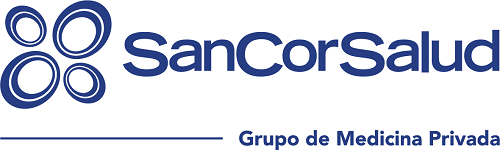


# Modelo de Prueba de Detección de Casos de Fraude:
## **Entrenamiento (BERT, PyTorch y Hugging Face) + Fine Tuning.**


## Análisis y Descripción del Modelo
---
## Objetivo:
* **Predecir si un caso es fraude o no fraude, en un dataset de autorizaciones de prestaciones médicas ambulatorias.**

* El dataset se extrajo del excel de **casos Derivados**
* El modelo se entrenó para clasificar textos de casos, que contienen información sobre:
  * **rubro**,
  * **motivo de derivación**,
  * **clasificación**,
  * **semáforos de personas**,
  * **semáforos de prestadores**
  * **categorías**,
  * **Librerías Utilizadas**

Las librerías utilizadas en este proyecto son principalmente de Hugging Face y otras esenciales para la manipulación de datos y evaluación del modelo:


  * **Transformers (Hugging Face)**:
    * **AutoTokenizer:** Para cargar el tokenizador preentrenado adecuado para el modelo de NLP.
    * **AutoModelForSequenceClassification**: Para cargar un modelo preentrenado para clasificación de secuencias.
    * **Trainer:** Para facilitar el entrenamiento y evaluación del modelo en un entorno de Hugging Face.
    * **TrainingArguments:** Para definir los parámetros de entrenamiento del modelo.

  * **Scikit-learn:**
    * **train_test_split:** Para dividir los datos en entrenamiento y prueba.
    * **classification_report:** Para generar un reporte detallado de las métricas de clasificación como precisión, recall, F1-score.
    * **roc_curve, auc, roc_auc_score:** Para calcular y graficar la curva ROC y su área (AUC).
    * **confusion_matrix:** Para generar y visualizar la matriz de confusión.
    * **compute_class_weight:** Para calcular los pesos de las clases, útil para manejar clases desbalanceadas.

  * **Pandas y Numpy:**
    * **pandas:** Para la carga y manipulación de datos estructurados en formato CSV.
    * **numpy:** Para operaciones matemáticas y la manipulación de arrays.
  
  * **Matplotlib y Seaborn:**
    * Para la visualización de métricas, curvas ROC, y la matriz de confusión.

* **Modelo de NLP Utilizado**
   * Se ha utilizado un modelo **BERT preentrenado para español: dccuchile/bert-base-spanish-wwm-uncased.**
      * Este modelo es una versión de BERT (Bidirectional Encoder Representations from Transformers), una red neuronal profunda diseñada para trabajar con secuencias de texto y entrenada en grandes corpus de texto en español.
      * BERT se ajusta bien a tareas de procesamiento de lenguaje natural (NLP) como clasificación de texto, ya que considera el contexto completo de la palabra (tanto de la izquierda como de la derecha).

    * En este caso, utilizamos el modelo con una tarea de clasificación binaria para predecir dos clases: Fraude (1) y No Fraude (0).

* **Tipo de Entrenamiento**
    * **Entrenamiento supervisado** con fine-tuning de un modelo preentrenado de BERT.
    * Esto implica ajustar el modelo a nuestro conjunto de datos específico para que pueda aprender a clasificar los casos de fraude basándose en los textos proporcionados.

* **Los pasos clave del entrenamiento incluyen:**
    * **Tokenización:** Los textos se convierten en tokens (subpalabras) que el modelo puede procesar.
    * **Entrenamiento:** Se utiliza el optimizador Adam con un learning rate ajustado, y el modelo se entrena durante un número específico de épocas.
    * **Evaluación:** Después de cada época, el modelo se evalúa en un conjunto de prueba para asegurar que no se está sobreajustando y para verificar su rendimiento.

* **Métricas Analizadas:** Para evaluar el rendimiento del modelo, se utilizan varias métricas clave:

  * **Precisión (Precision):**
    * Mide la cantidad de verdaderos positivos (fraude correctamente identificado) en relación con los casos que fueron etiquetados como fraude.
  * **Recall (Sensibilidad):**
    * Mide la cantidad de verdaderos positivos identificados entre todos los casos de fraude reales. En el caso de fraude, esta métrica es especialmente importante para asegurar que el modelo detecte la mayor cantidad de casos de fraude posible.
  * **F1-Score:**
    * La media armónica entre precisión y recall, que balancea ambas métricas y es útil cuando se tienen clases desbalanceadas.
  * **Accuracy (Exactitud):**
    * Mide la proporción de predicciones correctas (tanto fraude como no fraude) sobre el total de casos.
  * **Área bajo la Curva ROC (AUC-ROC):**
    * La curva **ROC (Receiver Operating Characteristic)** mide la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR).
    * El **área bajo esta curva (AUC)** proporciona una medida de cuán bien el modelo distingue entre las dos clases. Un AUC cercano a 1 indica un modelo excelente para clasificación.
  * **Matriz de Confusión:**
    * Muestra los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos, lo que ayuda a visualizar el rendimiento del modelo y identificar si el modelo tiene problemas de clasificación (por ejemplo, si tiende a predecir mucho la clase mayoritaria).

* **Ajustes y Consideraciones**
  * Se pueden ajustar las técnicas como **downsampling** para equilibrar las clases y evitar que el modelo se sesgue hacia la clase mayoritaria.
  * **Ajuste de Hiperparámetros:** Durante el entrenamiento, se pueden ajustar el **learning rate (tasa de aprendizaje)** y el **número de épocas** para mejorar la convergencia del modelo.
  * **Umbral de Decisión**: Se puede ajustar el umbral de decisión (ej. 0.75) para optimizar el trade-off entre precisión y recall.

* **Resultados Esperados**
  * El modelo debería ser capaz de identificar correctamente los casos de fraude, con una alta precisión y recall.
  * Un valor alto de AUC-ROC (cercano a 1) indicaría que el modelo tiene un buen desempeño discriminando entre las clases de fraude y no fraude.
  * La matriz de confusión nos ayuda a detectar posibles fallos en la clasificación y ajustar el modelo si es necesario.



---



In [1]:
# montar carpeta google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fine-tuning requiere un tiempo significativo, y necesitamos configurar colab para utilizar GPU:

In [ ]:
# Code to check if a GPU is available on our system.
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Nov  5 17:05:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Vemos de cuanta memoria RAM disponemos:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


## Instalamos las librerías necesarias:

In [2]:
#!pip install spacy transformers xgboost
#!python -m spacy download es_core_news_sm
!pip install sentence-transformers

In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## Importamos las librerías necesarias:

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import spacy
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight



---



## 1. Cargamos en un DataFrame, el dataset (Dataset_Fraude_Entrenamiento.csv) con la información a procesar:

In [33]:
# Carga del Dataset
# El mismo se hizo filtrando los casos que están en el archivo excel "casos derivados"
# Ubicación en el Drive de AMS
# https://docs.google.com/spreadsheets/d/1J8IELP3ho1qUUT8cYuMoJFetq2EIvzwuaaefetabZFI/edit?gid=0#gid=0

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/AMS/Dataset_Fraude_Entrenamiento.csv")

## Visualizamos algunos datos:

In [20]:
# Vista preliminar de las primeras 5 columnas seleccionadas:
data.head(5)

,ID,Rubro,Motivo por el que se deriva,Clasificación,Semáforo Persona,Semáforo Prestador,Categoría,FRAUDE
0,2.0,Consulta,Asociado se comunica por que el se realizó fon...,Correctiva,VERDE,AMARILLO,Aut x Valid,0
1,3.0,Medicamentos,Reclamo de asociado por tope,Correctiva,AMARILLO,AMARILLO,Desconocimiento,0
2,12.0,Laboratorio,Ante rechazo por supera tope 1 al año de NU 66...,Correctiva,VERDE,VERDE,Desconocimiento,0
3,15.0,Oftalmología,"Conducta prestacional, familiar colaborador in...",Correctiva,VERDE,VERDE,Desconocimiento,0
4,39.0,Imágenes,No autorizan prestación NM340670 desde el pres...,Correctiva,VERDE,VERDE,Homolog/Conven,0


In [ ]:
# Vista preliminar de las últimas 5 columnas:
data.tail(5)

,ID,Rubro,Motivo por el que se deriva,Clasificación,Semáforo Persona,Semáforo Prestador,Categoría,FRAUDE
210,341.1,Sesiones,Buenas Tardes! caso Relacionado 07706712 Profe...,Soporte,VERDE,ROJO,Desconocimiento,1
211,130.1,Prácticas,Nvo formulario 4 adulterado pero de fecha junio,Soporte,ROJO,VERDE,Adulteración Form Asoc,1
212,338.0,Sesiones,Socia se comunica indicando que tiene sesiones...,Soporte,VERDE,ROJO,Desconocimiento,1
213,557.0,Prácticas,"Para la socia GONZALEZ , VANESA SOLEDAD, DNI 3...",Soporte,VERDE,ROJO,Desconocimiento,1
214,107.0,Prácticas,Por rechazo en retiro de ACO afiliada desconoc...,Soporte,VERDE,ROJO,Desconocimiento,1




---



In [34]:
# Observamos la cantidad de casos de Fraude y No Fraude que tenemos en el dataset procesado:
fraude_counts = data['FRAUDE'].value_counts()
print("Cantidad de casos en el dataset:")
print(f"No Fraude (0): {fraude_counts.get(0, 0)}")
print(f"Fraude (1): {fraude_counts.get(1, 0)}")

Cantidad de casos en el dataset:
No Fraude (0): 94
Fraude (1): 121


* Hacemos un **balanceo de Clases** para tener aprox. la misma cantidad de casos Negativos y Positivos.

* Como este es un **diseño experimental de prueba**, quedaría por definir qué variables finalmente van a ser usadas, como variables independientes (predictoras),

* El léxico u ortografía usado en la columna **'Motivo por el que se deriva'** y que mejor define bien un caso de Fraude o no, debería ser en otra instancia limpiado y procesado semánticamente, por el uso de **acrónimos**, y contiene además **datos sensibles** (de pacientes, prestadores, etc) que deben ser silenciados.

* Quedaría pendiente además experimentar con otros modelos de NLP.


In [35]:
from sklearn.utils import resample

# Separamos las clases
no_fraude = data[data['FRAUDE'] == 0]
fraude = data[data['FRAUDE'] == 1]

# Downsampling de la clase 'Fraude' a 94 casos
fraude_downsampled = resample(fraude,
                              replace=False,  # sin reemplazo
                              n_samples=94,   # modificar la cantidad de nro de casos de Fraude (si se desea o si es necesario)
                              random_state=42)

# Combinamos de vuelta el dataset balanceado
data_balanced = pd.concat([no_fraude, fraude_downsampled])

# Mezclamos las filas para aleatorizar
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificamos otra vez la cantidad de casos después del balanceo
print("Cantidad de casos después del balanceo:")
print(data_balanced['FRAUDE'].value_counts())


Cantidad de casos después del balanceo:
FRAUDE
1    94
0    94
Name: count, dtype: int64




---



## Selección de las columnas (features) y la columna objetivo (target):
* Quedan como **Features**: ['Rubro', 'Motivo por el que se deriva', 'Categoría']
* **Target**: [Fraude]

In [36]:
# Preprocesamos y combinar el texto
data['text_combined'] = data[['Rubro', 'Motivo por el que se deriva', 'Categoría']].astype(str).agg(' '.join, axis=1)
data = data[['text_combined', 'FRAUDE']]

# Calculamos los los pesos de las clases
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(data['FRAUDE']), y=data['FRAUDE'])
class_weights = {i: weight for i, weight in enumerate(class_weights)}

# Separamos en conjunto de entrenamiento y prueba (le puse 80:20, pero se puede cambiar al valor deseado)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data['text_combined'].tolist(), data['FRAUDE'].tolist(), test_size=0.2, random_state=42
)



---



## 2. Tokenización y conversión a formato de Hugging Face
### Convertimos el dataset a un formato compatible con transformers.

* no utilizamos spaCy en este proceso.
* BERT ya maneja la tokenización y generación de embeddings directamente mediante el tokenizer.
* Este modelo de transformers y la librería Hugging Face están optimizadas para ese flujo de trabajo.

In [37]:
# Cargamos el tokenizer de BERT
model_name = "dccuchile/bert-base-spanish-wwm-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenizamos los datos
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Creamos datasets de Hugging Face
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})



---



## 3. Cargamos el modelo y preparamos para fine-tuning
* Usamos **AutoModelForSequenceClassification** para cargar el modelo BERT con una capa de clasificación adicional.

In [38]:
# Carga del el modelo para clasificación binaria
# Nos pone el mje de pesos, pero total mas abajo lo entrenamos (punto 5)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.




---



## 3.1 Asignación de los pesos de las clases Fraude y NO Fraude:

In [39]:
# Asignamos los pesos de las clases al modelo
model.config.class_weights = [class_weights[0], class_weights[1]]



---



## 4. Configuramos el entrenamiento:
* Especificamos los hiperparámetros de entrenamiento (TrainingArguments) y utilizamos el Trainer de Hugging Face para entrenar el modelo.

In [40]:
# Configuramos el entrenamiento, ver de cambiar las épocas de ser necesario
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Inicializamos el Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)



---



## 5. Entrenamos el modelo con los parámetros especificados:

In [41]:
# Entrenamos el modelo
print("Número de épocas que configuramos para entrenar: ", training_args.num_train_epochs)
trainer.train()

Número de épocas que configuramos para entrenar:  4


Epoch,Training Loss,Validation Loss
1,0.683300,0.591684
2,0.602300,0.625952
3,0.494300,0.542232
4,0.397000,0.513713


TrainOutput(global_step=44, training_loss=0.5298886488784443, metrics={'train_runtime': 1139.5576, 'train_samples_per_second': 0.604, 'train_steps_per_second': 0.039, 'total_flos': 45255101521920.0, 'train_loss': 0.5298886488784443, 'epoch': 4.0})



---



## 6. Evaluamos el modelo:
* Una vez completado el entrenamiento, podemos evaluar el modelo en el conjunto de prueba.

In [42]:
# Evaluación en el conjunto de prueba
trainer.evaluate()

{'eval_loss': 0.5137125849723816,
 'eval_runtime': 14.3315,
 'eval_samples_per_second': 3.0,
 'eval_steps_per_second': 0.209,
 'epoch': 4.0}



---



## 7. Guardamos el modelo entrenado en google Drive:
* Lo guardamos en el DRIVE al modelo ajustado para usarlo en predicciones futuras.

In [43]:
# Guardamos el modelo ajustado
model.save_pretrained("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/AMS/Modelo_Fraude_FineTuned")
tokenizer.save_pretrained("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/AMS/Modelo_Fraude_FineTuned")

('/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/AMS/Modelo_Fraude_FineTuned/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/AMS/Modelo_Fraude_FineTuned/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/AMS/Modelo_Fraude_FineTuned/vocab.txt',
 '/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/AMS/Modelo_Fraude_FineTuned/added_tokens.json',
 '/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/AMS/Modelo_Fraude_FineTuned/tokenizer.json')



---



## 8. Reporte de métricas

### Hacemos una predicción con el conjunto de prueba:

In [44]:
# Predecimos las etiquetas para el conjunto de prueba
y_pred = trainer.predict(test_dataset)
y_pred_labels = (y_pred.predictions[:, 1] >= 0.5).astype(int)  # Ajustar este umbral si es necesario
#y_pred_labels = y_pred.predictions.argmax(-1)  # Obtenemos las etiquetas predichas
y_pred_proba = y_pred.predictions[:, 1]  # Obtenemos las probabilidades de la clase positiva



---



### Calculamos la matriz de confusión, mostrando la relación entre las predicciones del modelo y las clases reales:

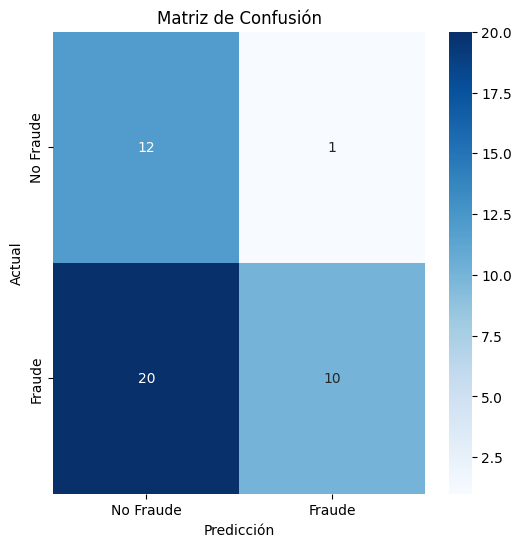

In [45]:
# Cálculo la matriz de confusión
cm = confusion_matrix(test_labels, y_pred_labels)

# Vemos la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()



---



### Curva ROC

In [46]:
# Reporte de clasificación
report = classification_report(test_labels, y_pred_labels, target_names=['No Fraude', 'Fraude'])
print("Reporte de Clasificación:\n", report)

# Calculamos el AUC-ROC
roc_auc = roc_auc_score(test_labels, y_pred_proba)
print("Área bajo la curva ROC (AUC-ROC):", roc_auc)

Reporte de Clasificación:
               precision    recall  f1-score   support

   No Fraude       0.38      0.92      0.53        13
      Fraude       0.91      0.33      0.49        30

    accuracy                           0.51        43
   macro avg       0.64      0.63      0.51        43
weighted avg       0.75      0.51      0.50        43

Área bajo la curva ROC (AUC-ROC): 0.8051282051282052


* El **AUC (Area Under the Curve)** mide la capacidad del modelo para distinguir entre clases.
* La curva ROC muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos.
* Un valor de 0.5 indica rendimiento aleatorio, mientras que un valor de 1.0 indica clasificación perfecta.
* Valores cercanos a 1 indican un buen desempeño del modelo en la distinción entre fraude y no fraude.
* Valores más bajos indican menor capacidad para distinguir correctamente las clases.




---



### Visualizamos la curva ROC completa:

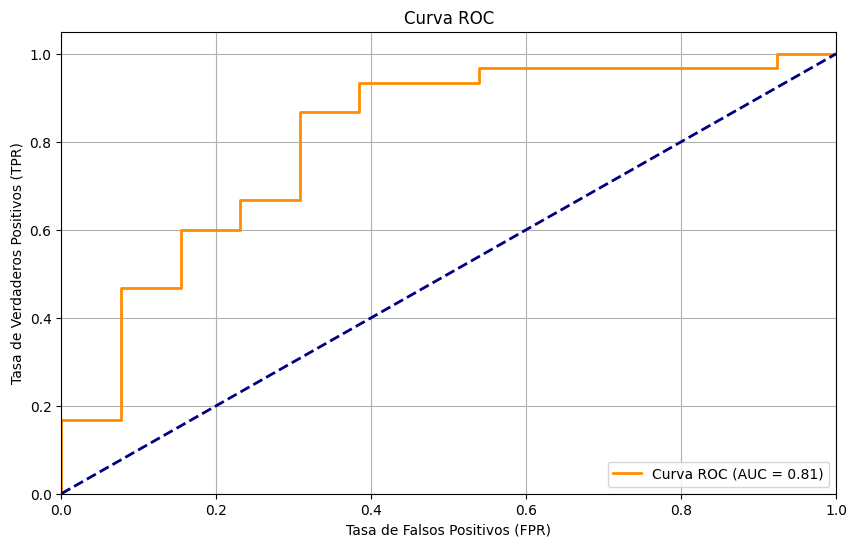

In [47]:
from sklearn.metrics import roc_curve, auc

# Calculamos de nuevo la curva ROC
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficamos la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()




---



## 9. Realizamos predicciones en un conjunto de datos de prueba test_data:

### El dataset **Dataset_Fraude_Prueba.csv** contiene casos extraídos del archivo excel **"casos derivados"**, y  que no se usaron para entrenar o validar el modelo.

### Obtenemos tanto la clase predicha como la probabilidad de fraude en porcentaje.

### Pasos:
* 👉🏻 **Cargamos el modelo ajustado junto con el tokenizer.**
* Preprocesamos el texto en test_data_path de manera similar al conjunto de entrenamiento.
* Generar predicciones y probabilidades de fraude.

In [48]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Ruta al dataset de prueba
test_data_path = '/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/AMS/Dataset_Fraude_Prueba.csv'

#test_data_path = '/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/AMS/Dataset_Fraude_Entrenamiento.csv'

# Ruta al modelo ajustado
model_path = "/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/AMS/Modelo_Fraude_FineTuned"

# Cargamos el tokenizer y el modelo ajustado
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Configuración para la evaluación
model.eval()  # Modo evaluación (desactiva dropout)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e



---



### Pasos:
* 👉🏻 **Cargamos el modelo ajustado junto con el tokenizer.**
* Preprocesamos el texto en test_data_path de manera similar al conjunto de entrenamiento.
* Generamos predicciones y probabilidades de fraude.


In [49]:
# Cargamos y procesamos el dataset de prueba
test_data = pd.read_csv(test_data_path)

# Previsualizamos el dataset:
test_data.head(12)


,ID,Rubro,Motivo por el que se deriva,Clasificación,Semáforo Persona,Semáforo Prestador,Categoría,FRAUDE
0,536.0,Consulta,Socia desconoce haber realizado COD 190102 - R...,Soporte,AMARILLO,VERDE,Desconocimiento,0
1,30.0,Internación,Tiene autorizados traslados urbanos del domici...,Soporte,AMARILLO,AMARILLO,Procesos Internos,0
2,184.0,Sesiones,Asociada se comunica ya que en caso 06167058 i...,Soporte,VERDE,AMARILLO,Desconocimiento,0
3,548.0,Imágenes,Por tope en el on line socia desconoce haber c...,Soporte,VERDE,AMARILLO,Desconocimiento,0
4,136.1,Prácticas,Afiliada desconoce estudios autorizados por el...,Soporte,VERDE,VERDE,Desconocimiento,0
5,450.0,Laboratorio,Asociada se comunica por rechazo de laboratori...,Soporte,AMARILLO,VERDE,Desconocimiento,0
6,74.2,Consulta,Desconoce consultas 2/6/23 bajo el N° 10007800...,Correctiva,VERDE,ROJO,Desconocimiento,1
7,120.0,Internación,Socio indica que el 27/7 le dieron una orden d...,Correctiva,VERDE,ROJO,Desconocimiento,1
8,284.0,Sesiones,Asociada solicita reclamar que la prof. en don...,Correctiva,VERDE,ROJO,Desconocimiento,1
9,312.0,Resto,Informa que asistió a consultas para hacer cx ...,Correctiva,VERDE,ROJO,Reclamo x AUT,1


### Pasos:
* Cargamos el modelo ajustado junto con el tokenizer.
* 👉🏻 **Preprocesamos el texto en test_data_path de manera similar al conjunto de entrenamiento.**
* Generamos predicciones y probabilidades de fraude.

In [50]:
# Preprocesamiento y combinación del texto para embeddings
test_data['text_combined'] = test_data[['Rubro', 'Motivo por el que se deriva', 'Categoría']].astype(str).agg(' '.join, axis=1)



In [51]:
# Función para realizar predicciones
def predict(text):
    # Tokenización
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():  # Se desactiva el cálculo de gradientes para predicción
        outputs = model(**inputs)
        logits = outputs.logits
        proba = torch.softmax(logits, dim=1).squeeze()  # Obtenemos probabilidades para cada clase
        pred_label = torch.argmax(proba).item()  # Obtenemos clase predicha
        pred_proba = proba[pred_label].item()  # Probabilidad de la clase predicha
    return pred_label, pred_proba



---



### Pasos:
* Cargamos el modelo ajustado junto con el tokenizer.
* Preprocesamos el texto en test_data_path de manera similar al conjunto de entrenamiento.
* 👉🏻 **Generamos predicciones y probabilidades de fraude.**

In [53]:
# Generamos predicciones para cada fila de test_data
test_data['Fraude_Predicho'] = 0  # Inicializamos la columna de predicciones
test_data['Probabilidad_Fraude'] = 0.0  # Inicializamos la columna de probabilidades
umbral_fraude = 0.7  # Umbral a ajustar 50-80%
print("Umbral de Decisión: ", umbral_fraude*100, "%")
# Iterar sobre las filas y calcular predicción y probabilidad
for index, row in test_data.iterrows():
    label, probability = predict(row['text_combined'])
    # Asignar "Fraude" (1) si la probabilidad es >= 50%
    test_data.at[index, 'Fraude_Predicho'] = 1 if probability >= umbral_fraude else 0
    test_data.at[index, 'Probabilidad_Fraude'] = probability * 100  # Probabilidad en porcentaje

    # Imprimir resultados para cada fila
    print(f"ID: {row['ID']}, Predicción: {'Fraude' if test_data.at[index, 'Fraude_Predicho'] == 1 else 'No Fraude'}, "
          f"Probabilidad de Fraude: {test_data.at[index, 'Probabilidad_Fraude']:.2f}%")


Umbral de Decisión:  70.0 %
ID: 536.0, Predicción: Fraude, Probabilidad de Fraude: 72.01%
ID: 30.0, Predicción: No Fraude, Probabilidad de Fraude: 50.38%
ID: 184.0, Predicción: No Fraude, Probabilidad de Fraude: 59.69%
ID: 548.0, Predicción: No Fraude, Probabilidad de Fraude: 60.66%
ID: 136.1, Predicción: No Fraude, Probabilidad de Fraude: 60.56%
ID: 450.0, Predicción: Fraude, Probabilidad de Fraude: 81.39%
ID: 74.2, Predicción: Fraude, Probabilidad de Fraude: 75.58%
ID: 120.0, Predicción: No Fraude, Probabilidad de Fraude: 56.23%
ID: 284.0, Predicción: Fraude, Probabilidad de Fraude: 71.23%
ID: 312.0, Predicción: Fraude, Probabilidad de Fraude: 72.75%
ID: 577.0, Predicción: Fraude, Probabilidad de Fraude: 85.79%
ID: 581.0, Predicción: Fraude, Probabilidad de Fraude: 76.50%


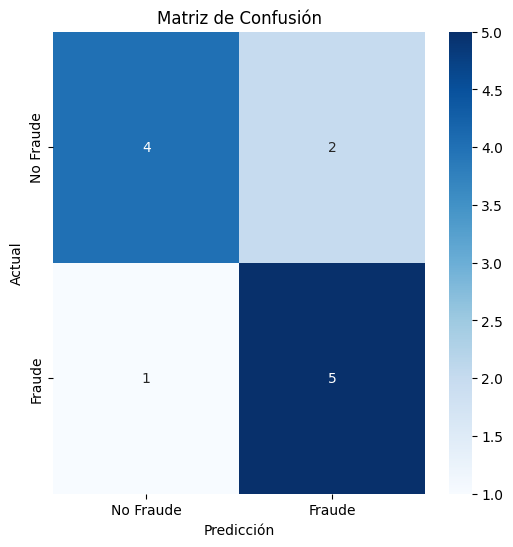

In [54]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenemos las etiquetas reales y predichas
y_true = test_data['FRAUDE']  # Suponiendo que la columna 'FRAUDE' contiene las etiquetas verdaderas
y_pred = test_data['Fraude_Predicho']
y_pred_proba = test_data['Probabilidad_Fraude'] / 100  # Convertir las probabilidades de vuelta a [0, 1]

# Calculamos la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Graficamos la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()




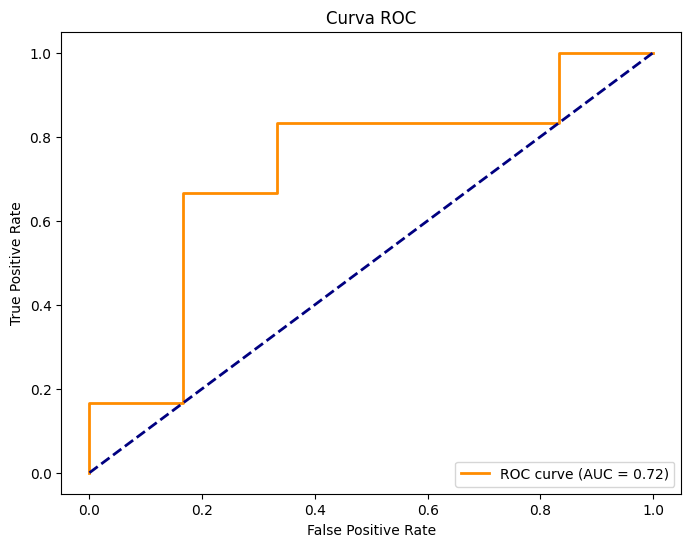

Reporte de Clasificación:
               precision    recall  f1-score   support

   No Fraude       0.80      0.67      0.73         6
      Fraude       0.71      0.83      0.77         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



In [55]:
# Calculamos y graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_true, y_pred, target_names=['No Fraude', 'Fraude']))



---





---

